In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM


In [45]:
train=pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [46]:
test=pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [47]:
train.sample(5)

,Date,Open,High,Low,Close,Volume
983,11/30/2015,748.81,754.93,741.27,742.6,"2,097,600"
262,1/18/2013,353.85,355.05,349.36,702.58,"6,477,700"
499,12/27/2013,557.91,558.05,554.39,"1,115.34","3,151,100"
135,7/17/2012,288.14,289.25,283.14,575.15,"3,372,700"
497,12/24/2013,555.40,555.54,551.98,"1,108.80","1,473,800"


In [48]:
test.sample(5)

,Date,Open,High,Low,Close,Volume
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
14,1/24/2017,822.30,825.90,817.82,823.87,"1,474,000"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"


In [49]:
test.shape

(20, 6)

In [50]:
train.shape

(1258, 6)

In [51]:
train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [52]:
test.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [53]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,533.709833,151.904442,279.12,404.115,537.47,654.9225,816.68
High,1258.0,537.880223,153.008811,281.21,406.765,540.75,662.5875,816.68
Low,1258.0,529.007409,150.552807,277.22,401.765,532.99,644.8000,805.14


In [54]:
train_set=train.iloc[:,1:2].values
print(train_set)
print(train_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [55]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_set=scaler.fit_transform(train_set)
print(scaled_train_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [56]:
X_train=[]
y_train=[]
for i in range(60,1258):
   X_train.append(scaled_train_set[i-60:i,0])
   y_train.append(scaled_train_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [57]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


Reshape the data

In [58]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

Building the Model by Adding Different Layers to LSTM.


In [59]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout (0.2))

model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout (0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

Fit the model

In [60]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 18ms/step - loss: 0.0453
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

In [61]:
actual=test.iloc[:,1:2].values

In [62]:
total = pd.concat((train['Open'],test['Open']), axis = 0)
inputs =total[len(total)- len(test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [63]:
predict_stoct=model.predict(X_test)
predict_stock=scaler.inverse_transform(predict_stoct)

1/1 [==============================] - 2s 2s/step


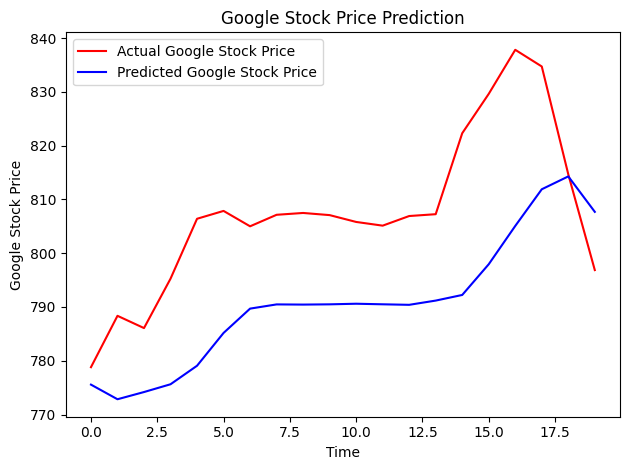

In [64]:
plt.plot(actual, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predict_stock, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.tight_layout()